In [26]:
%run -i startup2.py

In [2]:
# use the billinge group plot style
use_bg_mpl_style()

# Analyze the fitting results from the `analysis5.ipynb`

## Analyze the parameters of structures

In [3]:
params = xr.load_dataset("results2/parameters.nc")
params = process_param2(params)
params = params.sortby(["temperature", "time", "ligand"])
params

<xarray.Dataset>
Dimensions:        (dim_0: 4)
Dimensions without coordinates: dim_0
Data variables:
    L_sigma        float64 7.02
    L_phi          float64 -2.552
    L_amplitude    float64 0.09213
    L_wavelength   float64 4.051
    B_f_psize      (dim_0) float64 17.22 26.2 28.14 28.78
    B_f_psig       (dim_0) float64 8.234 9.948 11.81 11.7
    A_f_psize      (dim_0) float64 53.74 53.86 61.07 59.07
    A_scale        (dim_0) float64 0.02141 0.02161 0.05097 0.04307
    A_delta2       (dim_0) float64 3.414 2.216 3.479 6.189
    A_a            (dim_0) float64 3.784 3.786 3.785 3.785
    A_c            (dim_0) float64 9.525 9.497 9.501 9.499
    A_Ti1_Biso     (dim_0) float64 0.7247 0.5023 0.4941 0.5949
    A_O1_Biso      (dim_0) float64 1.653 1.29 1.302 1.502
    A_O1_z         (dim_0) float64 0.2127 0.2368 0.2129 0.2117
    B_scale        (dim_0) float64 0.5226 0.5277 0.5073 0.3953
    B_delta2       (dim_0) float64 1.902 2.139 1.604 2.546
    B_a            (dim_0) float64 12.19 12.18 12.19 12.18
    B_b            (dim_0) float64 3.747 3.746 3.747 3.75
    B_c            (dim_0) float64 6.493 6.495 6.502 6.497
    B_beta         (dim_0) float64 1.867 1.867 1.868 1.868
    B_Ti0_Biso     (dim_0) float64 0.5337 0.5303 0.4872 0.5589
    B_Ti1_Biso     (dim_0) float64 0.6103 0.4878 0.468 0.4443
    B_O2_Biso      (dim_0) float64 1.035 1.027 1.073 1.223
    B_O3_Biso      (dim_0) float64 2.499 2.178 1.899 1.991
    B_O4_Biso      (dim_0) float64 1.024 0.9588 1.09 1.012
    B_O5_Biso      (dim_0) float64 2.195 1.755 1.77 1.622
    B_Ti0_x        (dim_0) float64 0.1003 0.1008 0.101 0.1011
    B_Ti0_z        (dim_0) float64 0.7062 0.7063 0.707 0.7068
    B_Ti1_x        (dim_0) float64 0.1967 0.1961 0.1961 0.196
    B_Ti1_z        (dim_0) float64 0.2878 0.2864 0.2863 0.2865
    B_O2_x         (dim_0) float64 0.05997 0.05987 0.05941 0.06048
    B_O2_z         (dim_0) float64 0.3661 0.3631 0.363 0.3652
    B_O3_x         (dim_0) float64 0.1365 0.1379 0.1353 0.1343
    B_O3_z         (dim_0) float64 0.02029 0.01623 0.01167 0.01399
    B_O4_x         (dim_0) float64 0.1332 0.1352 0.1335 0.1353
    B_O4_z         (dim_0) float64 0.7113 0.7143 0.711 0.7123
    B_O5_x         (dim_0) float64 0.2314 0.2361 0.2358 0.2373
    B_O5_z         (dim_0) float64 0.3406 0.3475 0.3503 0.3536
    rw             (dim_0) float64 0.1177 0.1196 0.1076 0.1125
    Ti             (dim_0) float64 5.0 5.0 5.0 5.0
    Glycolic acid  (dim_0) float64 0.38 0.57 0.57 0.57
    H2SO4          (dim_0) float64 0.79 0.622 0.622 0.622
    H2O            (dim_0) float64 20.0 20.0 20.0 20.0
    temperature    (dim_0) float64 130.0 160.0 190.0 190.0
    time           (dim_0) float64 5.0 30.0 5.0 5.0
    ligand         (dim_0) float64 0.0 0.0 0.0 1.0
    diameter       (dim_0) float64 30.0 55.0 75.0 75.0
    samples        (dim_0) object 'JBNP32' 'JBNP31' 'JBNP33' 'JBNP33L'
    B_fraction     (dim_0) float64 96.06 96.07 90.87 90.18
    A_fraction     (dim_0) float64 3.936 3.935 9.13 9.825

## The quality of the fits

In [4]:
fits = xr.load_dataset("results2/fits.nc")
fits = fits.sortby(["temperature", "time", "ligand"])
fits = fits.assign({"rw": params["rw"]})
fits

<xarray.Dataset>
Dimensions:        (dim_0: 4, x: 4841, xobs: 10001)
Coordinates:
  * x              (x) float64 1.6 1.61 1.62 1.63 ... 49.97 49.98 49.99 50.0
  * xobs           (xobs) float64 0.0 0.01 0.02 0.03 ... 99.97 99.98 99.99 100.0
Dimensions without coordinates: dim_0
Data variables:
    y              (dim_0, x) float64 -0.6139 -0.6097 ... 0.001426 0.001998
    ycalc          (dim_0, x) float64 -0.509 -0.4935 ... -0.0008184 -0.0009841
    yobs           (dim_0, xobs) float64 0.0 -0.00372 ... 0.00147 0.001737
    Ti             (dim_0) float64 5.0 5.0 5.0 5.0
    Glycolic acid  (dim_0) float64 0.38 0.57 0.57 0.57
    H2SO4          (dim_0) float64 0.79 0.622 0.622 0.622
    H2O            (dim_0) float64 20.0 20.0 20.0 20.0
    temperature    (dim_0) float64 130.0 160.0 190.0 190.0
    time           (dim_0) float64 5.0 30.0 5.0 5.0
    ligand         (dim_0) float64 0.0 0.0 0.0 1.0
    diameter       (dim_0) float64 30.0 55.0 75.0 75.0
    samples        (dim_0) object 'JBNP32' 'JBNP31' 'JBNP33' 'JBNP33L'
    rw             (dim_0) float64 0.1177 0.1196 0.1076 0.1125

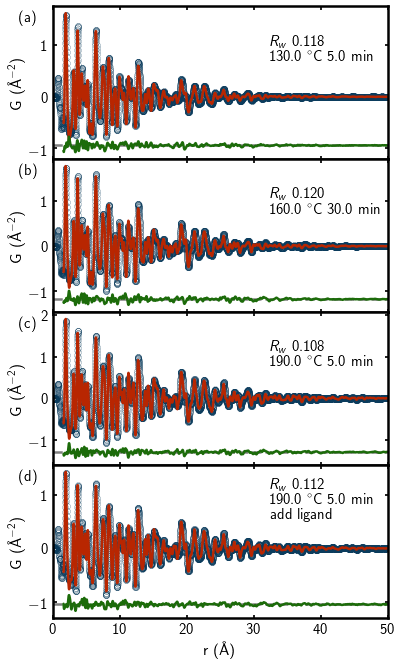

In [5]:
import string


axes = md.plot_fits_along_dim(fits, dim="dim_0", num_row=4, grid_config={"hspace": 0}, 
                              figure_config={"figsize": (4 * 1.5, 1.5 * 5 * 1.5)})

def edit_axes():
    n = len(axes)
    for i in range(n - 1):
        ax = axes[i]
        ax.set_xticklabels([])
        ax.set_xlabel("")
    for i in range(n):
        ax = axes[i]
        f = fits.isel(dim_0=i)
        ws = []
        rw = "$R_w$ {:.3f}\n".format(f["rw"].item())
        ws.append(rw)
        T = "{} $^\circ$C".format(f["temperature"].item())
        ws.append(T)
        t = "{} min".format(f["time"].item())
        ws.append(t)
        l = "\nadd ligand" if f["ligand"].item() else ""
        if l:
            ws.append(l)
        legend = " ".join(ws)
        ax.annotate(legend, (0.65, 0.65), xycoords='axes fraction')
        use_parentheses(ax)
        title = "({})".format(string.ascii_lowercase[i])
        ax.annotate(title, (-0.1, 0.9), xycoords='axes fraction')
    return
        
edit_axes()
paper_exporter("final_model_fitting.pdf")
plt.show()

## The $R_w$ compared with the results before

It seems that the quality of the fits is not as good as before and the parameters trend is not expected. Redo the fitting in the analysis5.ipynb.

In [6]:
def compare_Rw():
    sr = params.set_index({"dim_0": "samples"})["rw"].to_series()
    res = pd.read_csv("result.csv", index_col=0)
    sr2 = res.T["Rw"]
    return pd.concat([sr, sr2], axis=1)

In [7]:
compare_Rw()

,rw,Rw
JBNP32,0.117686,0.116418
JBNP31,0.119578,0.118445
JBNP33,0.107644,0.106460
JBNP33L,0.112453,0.112239
JBNP32L,NaN,0.167404


### The proportion of bronze phase

The proportion of the Bronze phase is correlated with the temperature if we think the sample 1 is an outlier.

If the outlier is removed, then the fraction of Bronze synthesized at 130 C has 5% more bronze phase inside.

In [16]:
plt.rcParams['lines.markersize'] = 12

In [18]:
get_colors()

['#0B3C5D',
 '#B82601',
 '#1c6b0a',
 '#328CC1',
 '#a8b6c1',
 '#D9B310',
 '#984B43',
 '#76323F',
 '#626E60',
 '#AB987A',
 '#C09F80',
 '#b0b0b0']

In [19]:
COLORS = ['#0B3C5D'] * 3 + ['#328CC1']

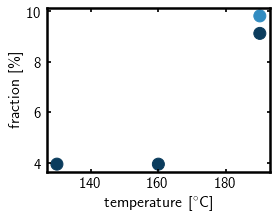

In [20]:
def show_fraction_of_bronze(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    params.plot.scatter("temperature", "A_fraction", ax=ax, c=COLORS)
    return
    
show_fraction_of_bronze()
plt.show()

### The lattice of bronze phase

The sample 1 is an outlier in structure parameters.

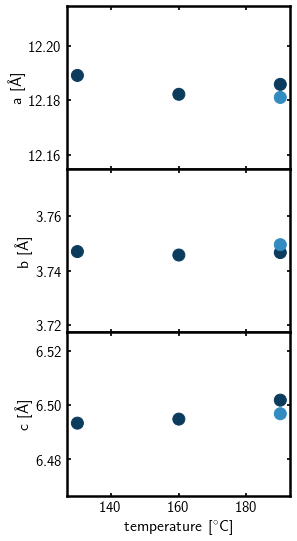

In [21]:
def show_lattice_of_bronze_phase(axes = None):
    if axes is None:
        fig, axes = plt.subplots(3, 1, sharex=True, gridspec_kw={"hspace": 0}, figsize=(4, 3 * 3))
    keys = ["B_a", "B_b", "B_c"]
    n = len(axes)
    for i in range(n):
        params.plot.scatter("temperature", keys[i], ax=axes[i], c=COLORS)
        mu = params[keys[i]].mean().item()
        sigma = params[keys[i]].max().item() - params[keys[i]].min().item()
        axes[i].set_ylim(mu - 0.03, mu + 0.03)
        # axes[i].legend(["{:.3f}".format(sigma)])
    return
    
show_lattice_of_bronze_phase()
plt.show()

### Particle size of the nanoparticles

The one synthesized at 130 C also has a much smaller particle size.

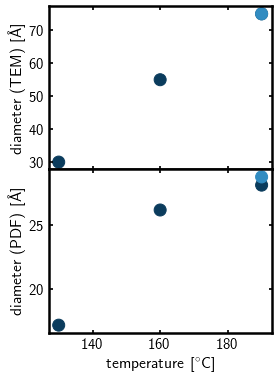

In [22]:
def show_sizes(axes=None):
    keys = ["diameter", "B_f_psize"]
    n = len(keys)
    if axes is None:
        fig, axes = plt.subplots(n, 1, sharex=True, figsize=(4, 3 * n), gridspec_kw={"hspace": 0})
    for i in range(n):
        params.plot.scatter("temperature", keys[i], ax=axes[i], c = COLORS)
    return

show_sizes()
plt.show()

### The disorder in the structure

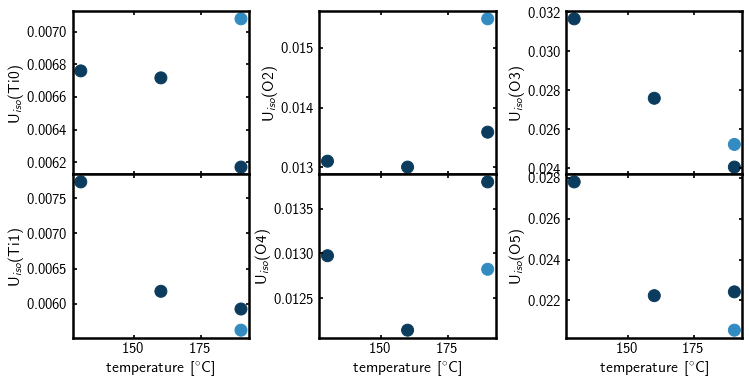

In [55]:
def show_adps(axes=None):
    if axes is None:
        fig, axes = plt.subplots(2, 3, sharex=True, gridspec_kw={"hspace": 0, "wspace": 0.4})
        fig.set_size_inches(3 * 4, 2 * 3)
    axes = axes.T.flatten()
    keys = ["B_Ti0_Biso", "B_Ti1_Biso", "B_O2_Biso", "B_O4_Biso", "B_O3_Biso", "B_O5_Biso"]
    params2 = params[keys] / (8 * np.pi ** 2)
    params2 = params2.assign({"temperature": params["temperature"]})
    n = len(keys)
    for i in range(n):
        params2[keys[i]].attrs["long_name"] = params[keys[i]].attrs["long_name"].replace("B", "U")
    for i in range(n):
        params2.plot.scatter("temperature", keys[i], ax=axes[i], c=COLORS)
    return

show_adps()
plt.show()

## Combine all the plots together

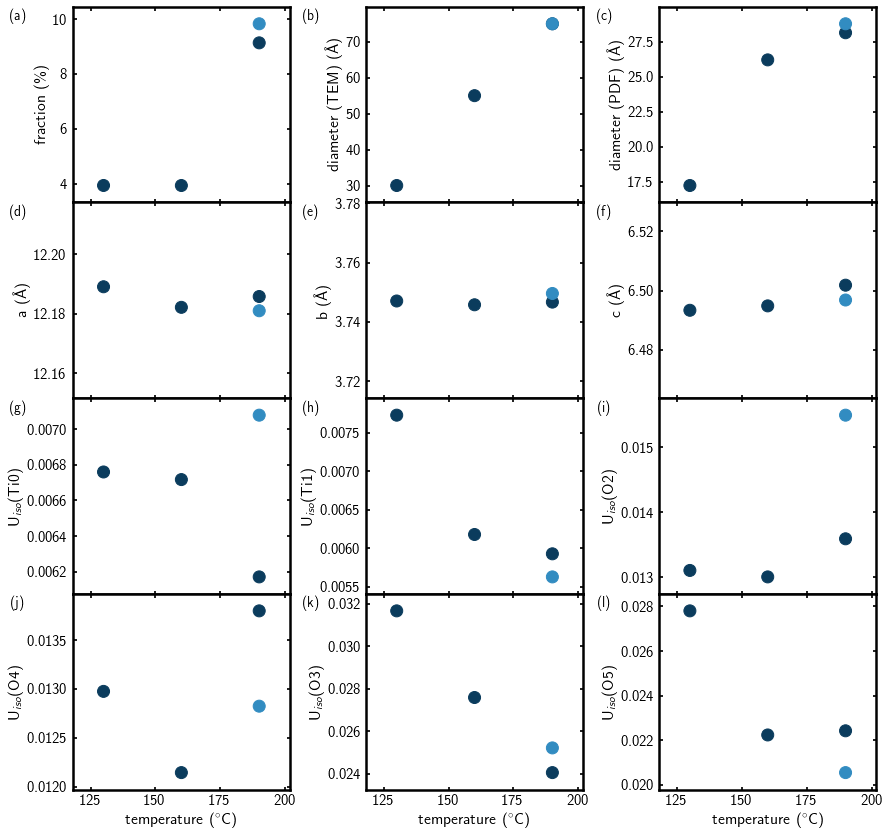

In [58]:
scale = 1.2
fig, axes = plt.subplots(
    4, 3, 
    sharex=True, 
    gridspec_kw={"wspace":0.35, "hspace":0.0}, 
    figsize=(4 * 3 * scale, 3 * 4 * scale)
)
# plot
show_fraction_of_bronze(axes[0, 0])
show_sizes(axes[0, 1:])
show_lattice_of_bronze_phase(axes[1, :])
show_adps(axes[2:, :].flatten())
# modify axes
ex, ey = 0.01, 0.05
for i, ax in enumerate(axes.flatten()):
    use_parentheses(ax)
    title = "({})".format(string.ascii_lowercase[i])
    xlim = ax.get_xlim()
    xlim2 = xlim[0] - ex * (xlim[1] - xlim[0]), xlim[1] + ex * (xlim[1] - xlim[0])
    ax.set_xlim(*xlim2)
    ylim = ax.get_ylim()
    ylim2 = ylim[0] - ey * (ylim[1] - ylim[0]), ylim[1] + ey * (ylim[1] - ylim[0])
    ax.set_ylim(*ylim2)
    ax.set_title(title, x=-0.25, y=0.9)
plt.show()

In [59]:
paper_exporter("parameters.pdf", fig=fig);